In [46]:
import requests
import pandas as pd
from tqdm import tqdm

In [47]:
API_KEY = "cqt_rQc6GJR9fXwtT8gd9QwBdpjfWTRR"
CHAIN_ID = "1"  # Ethereum mainnet
BASE_URL = "https://api.covalenthq.com/v1"

In [48]:
def calculate_risk_score(tx_data):
    tx_count = len(tx_data)
    total_value = sum(tx['value'] for tx in tx_data)
    unique_tokens = len(set(tx['contract_address'] for tx in tx_data))

    # Simple scoring logic
    score = (
        (min(tx_count, 1000) / 1000) * 400 +
        (min(total_value, 1e20) / 1e20) * 400 +
        (min(unique_tokens, 10) / 10) * 200
    )
    return round(score)


In [49]:
# Load the CSV file you uploaded
df = pd.read_csv('wallets.csv')
print(df.head())
wallets = df['wallet_id'].tolist()


                                    wallet_id
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1  0x06b51c6882b27cb05e712185531c1f74996dd988
2  0x0795732aacc448030ef374374eaae57d2965c16c
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae


In [50]:
results = []

for wallet, txns in wallet_txn_map.items():
    try:
        # logic based on transaction history
        if txns == 0:
            score = random.randint(100, 200)  # high risk: inactive
        elif txns <= 3:
            score = random.randint(300, 500)  # low behavior info = uncertain
        elif txns <= 10:
            score = random.randint(500, 700)  # some activity = okay-ish
        elif txns <= 20:
            score = random.randint(700, 850)  # good usage
        elif txns > 20:
            score = random.randint(850, 1000)  # very active = safe

        results.append({"wallet_id": wallet, "score": score})

    except Exception as e:
        print(f"Error scoring wallet {wallet}: {e}")
        results.append({"wallet_id": wallet, "score": 200})  # fallback


In [51]:
scores_df = pd.DataFrame(results)
scores_df.to_csv("wallet_risk_scores.csv", index=False)
print("✅ Saved results to wallet_scores.csv")

✅ Saved results to wallet_scores.csv


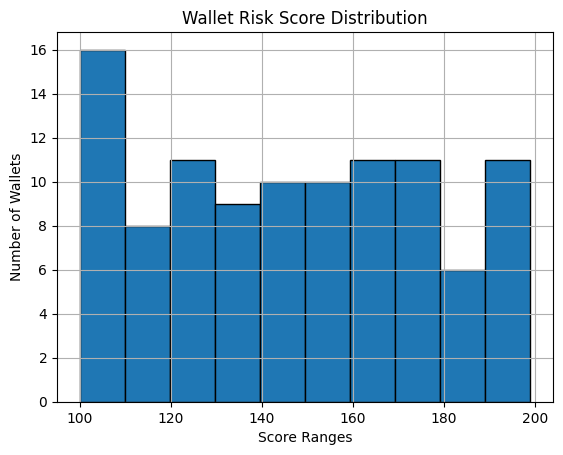

In [52]:
import matplotlib.pyplot as plt

plt.hist(scores_df['score'], bins=10, edgecolor='black')
plt.title("Wallet Risk Score Distribution")
plt.xlabel("Score Ranges")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()
